In [1]:
import pandas as pd
import os
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

is_cuda_available = torch.cuda.is_available()
print(f"CUDA Available: {is_cuda_available}")

device = torch.device("cuda" if is_cuda_available else "cpu")
print(f"Using device: {device}")


CUDA Available: True
Using device: cuda


In [2]:
directory = r"C:\Users\mahrouaa\CS283_Project\DataPump\CS283\new_1m_binance"

all_highs = pd.DataFrame()

for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)
        high_series = df['High']
        all_highs = pd.concat([all_highs, high_series.rename(filename)], axis=1)

all_highs.reset_index(drop=True, inplace=True)

all_highs

,10.csv,100.csv,102.csv,103.csv,105.csv,107.csv,108.csv,109.csv,11.csv,110.csv,...,86.csv,87.csv,88.csv,89.csv,9.csv,92.csv,94.csv,95.csv,97.csv,99.csv
0,0.000011,0.000004,0.000004,0.000004,0.04158,1.140000e-06,0.000001,6.800000e-07,0.000010,0.000014,...,0.000027,0.000035,0.000027,0.000024,0.000017,0.000004,0.000003,0.000004,0.000004,0.000004
1,0.000011,0.000004,0.000004,0.000004,0.04165,1.140000e-06,0.000001,6.800000e-07,0.000010,0.000014,...,0.000027,0.000035,0.000027,0.000024,0.000017,0.000004,0.000003,0.000004,0.000004,0.000004
2,0.000011,0.000004,0.000004,0.000004,0.04165,1.140000e-06,0.000001,6.800000e-07,0.000010,0.000014,...,0.000027,0.000035,0.000027,0.000024,0.000017,0.000004,0.000003,0.000004,0.000004,0.000004
3,0.000011,0.000004,0.000004,0.000004,0.04165,1.140000e-06,0.000001,6.800000e-07,0.000010,0.000014,...,0.000027,0.000035,0.000027,0.000024,0.000017,0.000004,0.000003,0.000004,0.000004,0.000004
4,0.000011,0.000004,0.000004,0.000004,0.04165,1.140000e-06,0.000001,6.800000e-07,0.000010,0.000014,...,0.000027,0.000035,0.000027,0.000024,0.000017,0.000004,0.000003,0.000004,0.000004,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000011,0.000003,0.000004,0.000004,0.04204,9.500000e-07,0.000001,6.700000e-07,0.000011,0.000016,...,0.000027,0.000035,0.000029,0.000024,0.000019,0.000005,0.000003,0.000004,0.000005,0.000004
996,0.000011,0.000003,0.000004,0.000004,0.04201,9.500000e-07,0.000001,6.700000e-07,0.000011,0.000016,...,0.000027,0.000035,0.000029,0.000024,0.000019,0.000005,0.000003,0.000004,0.000005,0.000004
997,0.000011,0.000003,0.000004,0.000004,0.04203,9.500000e-07,0.000001,6.700000e-07,0.000011,0.000016,...,0.000027,0.000035,0.000029,0.000024,0.000019,0.000005,0.000003,0.000004,0.000005,0.000004
998,0.000011,0.000003,0.000004,0.000004,0.04201,9.500000e-07,0.000001,6.700000e-07,0.000011,0.000016,...,0.000027,0.000035,0.000029,0.000024,0.000019,0.000005,0.000003,0.000004,0.000005,0.000004


In [3]:
normalized_data = all_highs.apply(lambda x: -1 + 2 * (x - x.min()) / (x.max() - x.min()), axis=0)
normalized_data_tensor = torch.tensor(normalized_data.values).float().transpose(0, 1).to(device)
normalized_data_tensor=normalized_data_tensor.to(device)
print(normalized_data_tensor.shape)

torch.Size([466, 1000])


torch.Size([466, 1000])


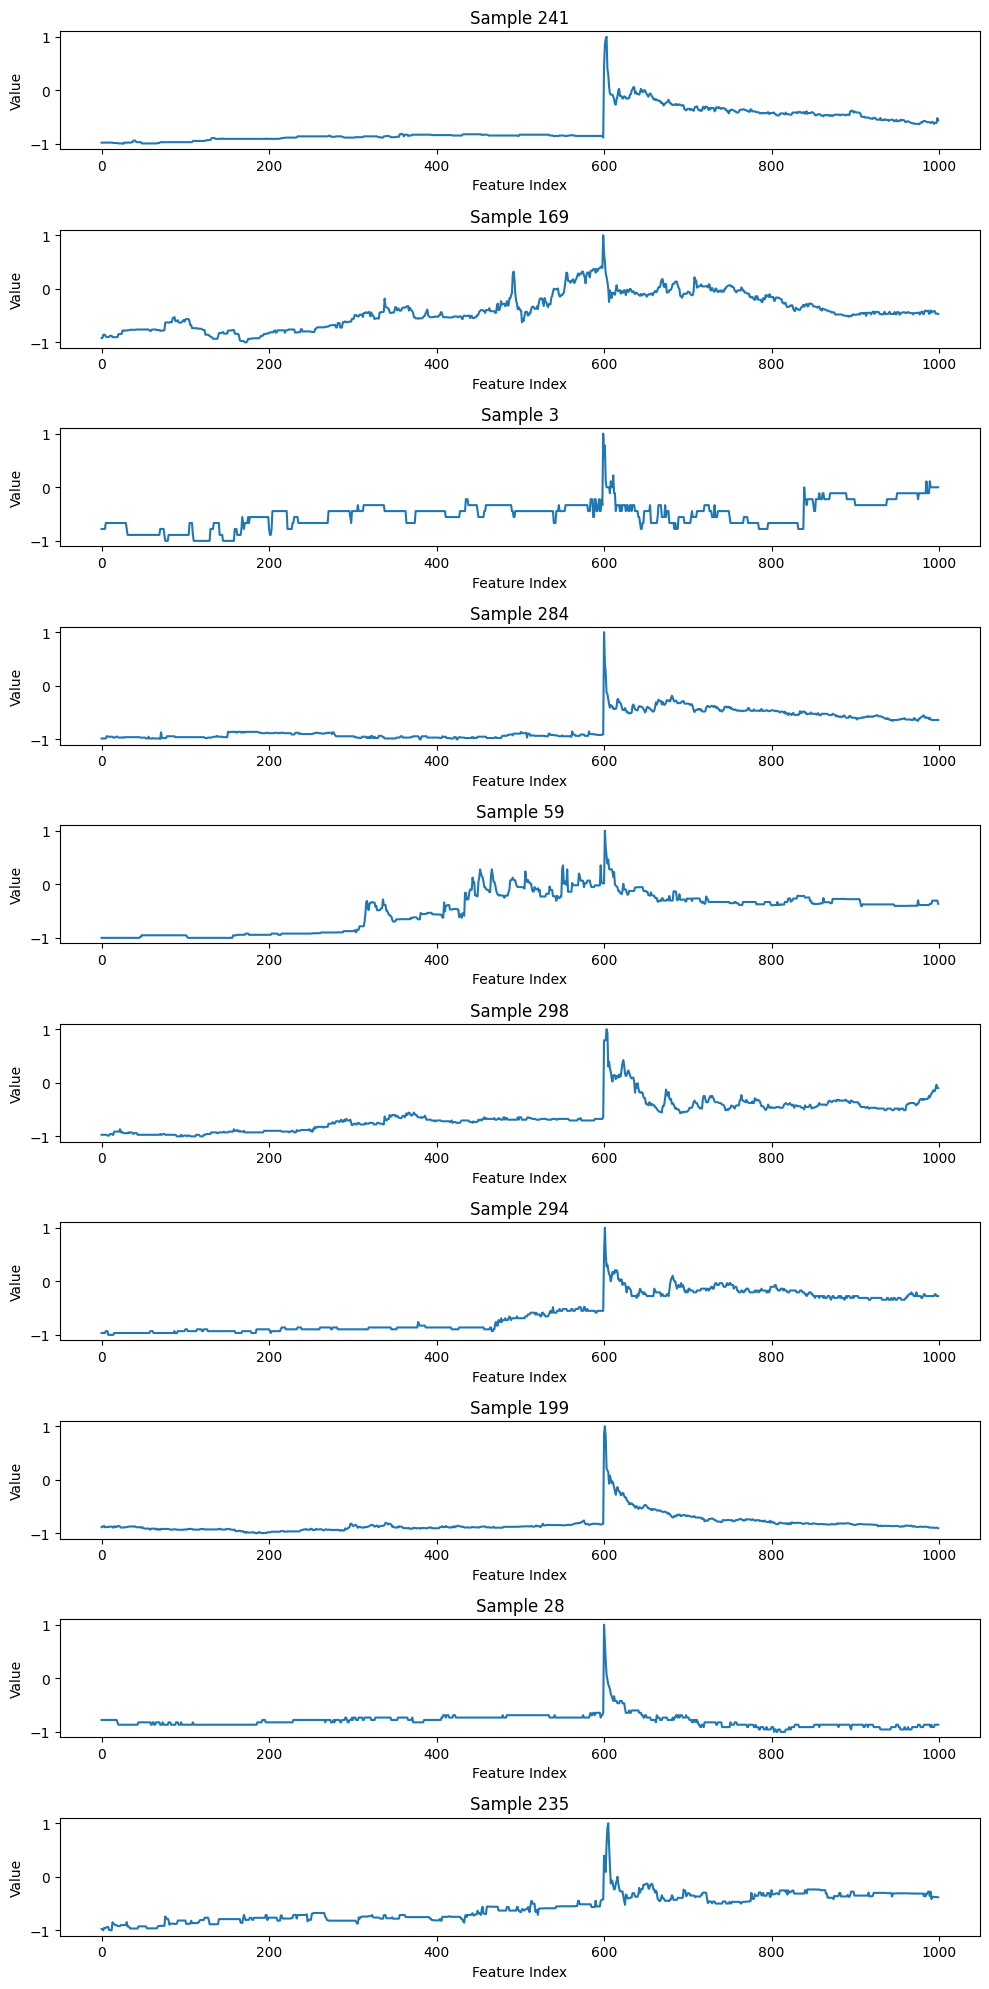

In [5]:
import matplotlib.pyplot as plt
print(normalized_data_tensor.shape)

normalized_data_cpu = normalized_data_tensor.cpu()

random_indices = np.random.choice(466, 10, replace=False)

fig, axs = plt.subplots(10, 1, figsize=(10, 20))

for idx, i in enumerate(random_indices):
    axs[idx].plot(normalized_data_cpu[i])
    axs[idx].set_title(f'Sample {i}')
    axs[idx].set_xlabel('Feature Index')
    axs[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()


In [6]:
def generate_sample(vae, latent_size, epoch):
    vae.eval()
    with torch.no_grad():
        noise = torch.randn(1, latent_size).to(device)
        generated_time_series = vae.decoder(noise)
        generated_time_series_cpu = generated_time_series.cpu()
        generated_time_series_np = generated_time_series_cpu.squeeze().numpy()

        plt.figure(figsize=(10, 2))
        plt.plot(generated_time_series_np)
        plt.title(f"Generated Sample at Epoch {epoch}")
        plt.show()

C:\Users\mahrouaa\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


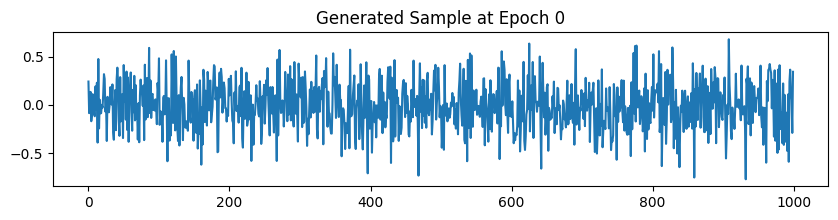

  3%|██▏                                                                             | 27/1000 [00:53<31:50,  1.96s/it]


KeyboardInterrupt: 

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm

class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size, dropout_rate=0.5):
        super(VAE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, latent_size * 2)  
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, input_size)
        )
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        x = self.encoder(x)
        mu, logvar = torch.chunk(x, 2, dim=-1)
        
        z = self.reparameterize(mu, logvar)
        
        x_recon = self.decoder(z)
        return x_recon, mu, logvar

input_size = 1000
hidden_size = 256
latent_size = 64
learning_rate = 1e-3
num_epochs = 1000
sample_interval = num_epochs // 5
clip_value = 5

vae = VAE(input_size, hidden_size, latent_size).to(device)

def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

optimizer = optim.Adam(vae.parameters(), lr=learning_rate, weight_decay=1e-5)

generate_sample(vae, latent_size, epoch=0)

for epoch in tqdm(range(num_epochs)):
    for data_tensor in normalized_data_tensor:
        recon_time_series, mu, logvar = vae(data_tensor)
        
        loss = loss_function(recon_time_series, data_tensor, mu, logvar)
        
        optimizer.zero_grad()
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(vae.parameters(), clip_value)

        optimizer.step()
    if (epoch + 1) % sample_interval == 0:
        generate_sample(vae, latent_size, epoch + 1)

torch.save(vae.state_dict(), 'pumpVAE.pth')


In [ ]:
with torch.no_grad():
    z = torch.randn(1, latent_size).to(device)
    
    generated_time_series = vae.decoder(z)

print("Generated time series:", generated_time_series.shape)


generated_time_series_cpu = generated_time_series.cpu()

generated_time_series_np = generated_time_series_cpu.squeeze().numpy()

plt.plot(generated_time_series_np)
plt.title('Generated Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt

vae.eval()

fig, axs = plt.subplots(10, 1, figsize=(10, 20))

for i in range(10):
    with torch.no_grad():
        z = torch.randn(1, latent_size).to(device)
        
        generated_time_series = vae.decoder(z)
    
    generated_time_series_cpu = generated_time_series.cpu()
    generated_time_series_np = generated_time_series_cpu.squeeze().numpy()
    
    axs[i].plot(generated_time_series_np)
    axs[i].set_title(f'Generated Time Series {i+1}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')

plt.tight_layout()
plt.show()
